Click [here](https://tjroginsky.github.io/CMPS-3660-Tutorial/) to view the notebook online.

<a href='#milestone2'> Click here to skip to Milestone 2. </a>

# Milestone 1

For the CMPS-3660 Final Project, we (Dinuka Malith and Tom Roginsky) plan on working in a group of two. Below are two of the data sets that we are intersted in.

In [3]:
!pip install pycountry
!pip install pycountry-convert
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pycountry
import pycountry_convert as pcc
import numpy
!python3 -m pip install lxml
from bs4 import BeautifulSoup
import requests as rq

In [4]:
df_trade = pd.read_excel("GTA_all_data.xlsx")
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaN,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain


For our project, we are looking to explore global economic developments pertaining to trade protectionism. An interesting dataset we came across was one posted by Global Trade Alert, an initiative by the Center for Policy Research which provides full coverage of the trade-discriminatory measures all across the globe. We are interested in observing the trends of these measures over the past few years, how this has evolved from region-to-region, what types of trade discriminatory measures countries have resorted to, and how some of the measures implemented align with the country’s said objectives.
   
The dataset provided by Global Trade Alert provides tons of information that helps us to answer these questions. Starting from 2008, the dataset lists which countries have implemented such measures, along with the countries they are implemented on. It provides the type of the measure – non-tariff or tariff, on what products, and whether the measure is currently in force. GTA also have a unique “color” indicator which states the serious of measure, with red classifying those which certainty discriminates foreign commercial interests, yellow which could potential deter foreign commercial interests, and green which pertain to more liberalizing (i.e. Anti-trade) measures. 
    
As mentioned earlier, this dataset provides an opportunity to pursue one, or many of our said goals. With the rapid global trade developments across the world, ranging from US-China trade war, China’s New Silk Road, and Brexit, it would be interesting to conduct a time-series analysis on the change in the global trade landscape since the 2008 recession. We are currently looking for a data set that matches the one with GTA but goes further back than 2008. Another key question we look to analyze is how the global landscape has evolved since the 2008 financial crises. Part of the severity of the recession in 2008 was linked to “global interconnectedness,” where trouble in the major developed and developing countries had subsequent negative effects on other smaller and more dependent economies. It will be interesting to whether countries have now taken steps to protect themselves from external factors by insulating themselves from the global trade environment, either relying on themselves for the provisions of goods and services or focusing on more “regional” trade developments as opposed to global.

<a id='milestone2'> </a>
# Milestone 2

For our project, we've decided to go ahead with the data provided by the Global Trade Alert Database. This Database consists of information on the types of trade measures implemented over the past ten years. This dataset is quite extensive as the information provided to us is broken by the how protective/liberal the measure is, implementing/receiving jurisdictions, affected sectors and products, and the length of the trade measures. Let's take a quick look at our data before we start working towards meeting our objectives for this milestone. The dataset can be found [at this link](https://www.globaltradealert.org/data_extraction), or on our github as 'GTA_all_data.xlsx'.

In [5]:
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaN,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain


### Tidying Data

Fortunately, the data we worked was quite easy to load and already met the key principles of the tidy data format. However, we wanted transform our variables to help us with visualizations and also with our calculations. First, we looked at potential variables that need transformation in their dtypes. Most of the data except for Inception Date, Announcement Date, and Removal Date were in the type we wanted. Similar to Project 1, we converted these variables to datetime format.

In [6]:
df_trade.dtypes

State Act ID                  int64
Intervention ID               int64
State Act Title              object
Announcement Date            object
GTA Evaluation               object
Currently in force           object
Inception Date               object
Removal Date                 object
Implementing Jurisdiction    object
Intervention Type            object
MAST chapter                 object
Affected Sectors             object
Affected Products            object
Affected Jurisdiction        object
dtype: object

In [7]:
df_trade['Inception Date'] =  pd.to_datetime(df_trade['Inception Date'])
df_trade['Announcement Date'] =  pd.to_datetime(df_trade['Announcement Date'])
df_trade['Removal Date'] =  pd.to_datetime(df_trade['Removal Date'])

### Exploratory Data Analysis

#### Summary Statistics

We don't have a lot of quantitative variables to analyse, but we have an important categorical variable in GTA Evaluation, which measures how liberal/restrictive a trade measure has been. According to GTA, green labeled interventions are know has trade liberalising, red known as harmful, and amber categorized as those that have strong chance of being harmful to trade prospects. Over the time period after the recession from 2008 throught 2018 the trade environment has been somewhat bleak. Over a half of the measures implemented during this 10 year period have been red, while only 35% of have been trade liberalising. 

In [8]:
df_trade.columns = ['State Act ID', 'Intervention ID', 'State Act Title',
       'Announcement Date', 'GTA_Evaluation', 'Currently in force',
       'Inception Date', 'Removal Date', 'Implementing Jurisdiction',
       'Intervention Type', 'MAST chapter', 'Affected Sectors',
       'Affected Products', 'Affected Jurisdiction']

In [9]:
gta_counts = df_trade["GTA_Evaluation"].value_counts()
gta_counts/gta_counts.sum()

Red      0.574244
Green    0.344987
Amber    0.080769
Name: GTA_Evaluation, dtype: float64

### Graph 1

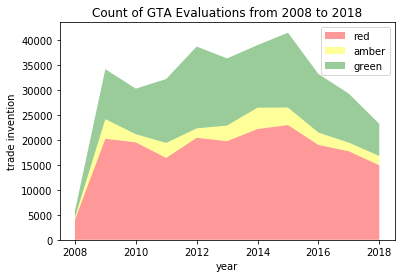

In [10]:
df_trade["announcement_year"] = df_trade["Announcement Date"].dt.strftime("%Y")
df_trade["announcement_year"] =  pd.to_numeric(df_trade["announcement_year"])
df_trade_after_2007 = df_trade[df_trade["announcement_year"] >= 2008]
year_gta_pivot = (df_trade_after_2007.groupby(["announcement_year", "GTA_Evaluation"]).GTA_Evaluation)
green = year_gta_pivot.count().unstack(["GTA_Evaluation"])['Green']
amber = year_gta_pivot.count().unstack(["GTA_Evaluation"])['Amber']
red = year_gta_pivot.count().unstack(["GTA_Evaluation"])['Red']

x_axis = year_gta_pivot.count().unstack(["GTA_Evaluation"]).index.tolist()
y_axis =[red, amber, green]
 
pal = ["red", "yellow", "green"]
plt.stackplot(x_axis, y_axis, labels=['red','amber','green'], colors=pal, alpha=0.4)
plt.legend(loc='upper right')
plt.xlabel('year')
plt.ylabel('trade invention')
plt.title('Count of GTA Evaluations from 2008 to 2018')
plt.show()



### Graph 2

A key variable to our project is the Intervention Type. This data consists of all types of trade measures that have been implemented since 2008. Unfortunately, there are way too many categories that make it difficult to conduct our analysis and visualization. To fix this, we thought it would be easier to categorize into two main buckets: Import Tariff and Non-Tariff Measure. To do this, we first created a variable "mask" that returns True if the Intervention is Import Tariff and Non-Tariff otherwise. We then used our mask variable to map this onto our new variable in the data "Trade Measure Type." Using this new variable, we now only had two categories to work with, and made it much simpler to do a small visualization on how these two measures have evovled over time. 

In [11]:
df_trade["mask"] = (df_trade["Intervention Type"] == "Import tariff") | (df_trade["Intervention Type"] == "Import tariff quota")

In [12]:
df_trade["Trade Measure Type"] = df_trade["mask"].map({
    True : "Tariff",
    False : "Non-Tariff",
})

df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction,announcement_year,mask,Trade Measure Type
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France,2008,True,Tariff
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates,2008,True,Tariff
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom,2008,True,Tariff
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal,2008,True,Tariff
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,2009,False,Non-Tariff


In [13]:
pd.DataFrame(df_trade['Affected Sectors']).loc[3:11]

,Affected Sectors
3,333
4,"429, 439, 441, 476, 479, 381"
5,389
6,439
7,448
8,473
9,439
10,448
11,"429, 439, 381"


In [14]:
df_trade["announcement_year"] = df_trade["Announcement Date"].dt.strftime("%Y")

In [15]:
df_trade["announcement_year"] =  pd.to_numeric(df_trade["announcement_year"])
year_tmes_df = df_trade.groupby("announcement_year")["Trade Measure Type"].value_counts().to_frame()


In [16]:
non_tariff = []
tariff = []
for i in range(1, 23):
    if i % 2 == 0:
        tariff.append(year_tmes_df['Trade Measure Type'][i])
    else:
        non_tariff.append(year_tmes_df['Trade Measure Type'][i])
        
years = []
for i in range(2008, 2019):
    years.append(i)
data = {
    'years': years, 
    'non_tariff': non_tariff, 
    'tariff': tariff }
tar_line_df = pd.DataFrame(data)

Our second graph consists of an analysis between the how the Import Tariffs and Non-Import Tariffs have progressed over time. We noticed two things in our analysis. First, there's a strong relationship between both Non-Tariff and Tariff Measures up until 2012. The positive relationship between break off and then resume after 2015. We're interested in finding out the deviation between the two. Additionally, looking at the data after 2016, both the tariff and non-tariff barriers have comparatively reduced, which seems a bit unusual considering the heightened trade tensions between some of the biggest trading countries like the United States and China. We are keen on identifying which regions or countries have been offsetting some of the increased import measures between China and the United States.

Text(0.5, 1.0, 'Trade Measures from 2008 throught 2018')

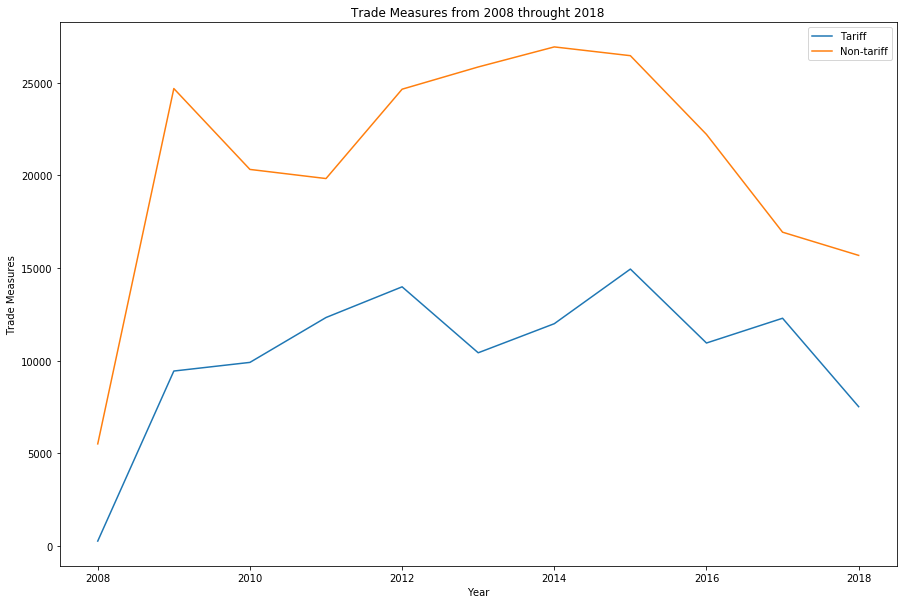

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.plot(tar_line_df['years'], tar_line_df['tariff'], label='Tariff')
ax.plot(tar_line_df['years'], tar_line_df['non_tariff'], label='Non-tariff')

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Trade Measures')
ax.set_title('Trade Measures from 2008 throught 2018')

In [18]:

non_tariff = []
tariff = []
for i in range(1, 23):
    if i % 2 == 0:
        tariff.append(year_tmes_df['Trade Measure Type'][i])
    else:
        non_tariff.append(year_tmes_df['Trade Measure Type'][i])
years = []
for i in range(2008, 2019):
    years.append(i)


Here we used a library called pycountry_convert to match each country to its continent. About 10 of the countries names were slightly different in out dataset than they are in the pycountry_convert library, so we had to change them to use the library.

In [19]:
df_trade["Implementing Jurisdiction"].replace({"Republic of Korea": "Korea, Republic of", 
                                               "Bosnia & Herzegovina": "Bosnia and Herzegovina", 
                                               "Chinese Taipei": "Taiwan", "Trinidad & Tobago": "Trinidad and Tobago", 
                                              "US Virgin Islands": "Virgin Islands, U.S.", 
                                              "DR Congo": "Congo, The Democratic Republic of the", 
                                              "Lao": "Lao People's Democratic Republic",
                                              "Sao Tome & Principe": "Sao Tome and Principe",
                                              "Antigua & Barbuda": "Antigua and Barbuda",
                                              "Saint Kitts & Nevis": "Saint Kitts and Nevis",
                                              "Saint Vincent & the Grenadines": "Saint Vincent and the Grenadines"}, 
                                              inplace=True)

df_trade["Affected Jurisdiction"].replace({"Republic of Korea": "Korea, Republic of", 
                                               "Bosnia & Herzegovina": "Bosnia and Herzegovina", 
                                               "Chinese Taipei": "Taiwan", "Trinidad & Tobago": "Trinidad and Tobago", 
                                              "US Virgin Islands": "Virgin Islands, U.S.", 
                                              "DR Congo": "Congo, The Democratic Republic of the", 
                                              "Lao": "Lao People's Democratic Republic",
                                              "Sao Tome & Principe": "Sao Tome and Principe",
                                              "Antigua & Barbuda": "Antigua and Barbuda",
                                              "Saint Kitts & Nevis": "Saint Kitts and Nevis", "U.S.": "United States of America",
                                              "Saint Vincent & the Grenadines": "Saint Vincent and the Grenadines",}, 
                                              inplace=True)



In [20]:
df_trade['impl_continent'] = df_trade["Implementing Jurisdiction"].apply(lambda x: 
                                            pcc.country_alpha2_to_continent_code(pcc.country_name_to_country_alpha2(x, cn_name_format="default")))



### Graph 3

Our third chart was to do a brief analysis of who implements these trade measures. We decided to construct a pie chart analysis to see who's been the most active in this area. Quite interestingly, Europe and Asia are the two most active, followed by North America. Europe is the largest trading bloc in world, so it's no surpise to us that they are among the most active in implementing trade measures. Asia coming in second is interesting as it is perhaps attributed to the fact that is quite a large region in terms of population, but could also be explained by the large shifts in trade sentiment following the 2008 recession. 

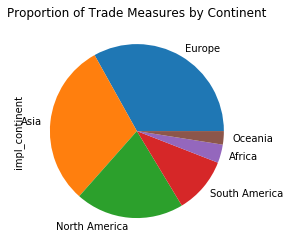

In [21]:
trade_region= df_trade.impl_continent.value_counts()
trade_region.plot.pie(title='Proportion of Trade Measures by Continent', 
                      labels=["Europe", "Asia", "North America", "South America", "Africa", "Oceania"])




### Data Scraping

Here we scraped data from the Global Trade Alert website to associate each sectorID with a sector. We plan on using this to better understand how trade affect different sectors, as each act in out primary dataset has a list of affected sectors associated with it. The data was scraped from [this](https://www.globaltradealert.org/sectors) page.

In [22]:
r = rq.get('https://www.globaltradealert.org/sectors')
bisque = BeautifulSoup(r.text, 'html.parser')
crabby = bisque.prettify()
sector_lists = bisque.find("ul", class_="list-unstyled sector_search")
bisque.find("ul", class_="list-unstyled sector_search")

sector_li = sector_lists.find_all("li")
sector_li

sectorIDs = []
sectorNames = []

for i in range(0, 329):
    sectorIDs.append(sector_li[i]['id'][7:])
    sectorNames.append(sector_li[i]['name'])
    
sector_df = pd.DataFrame({'sectorID': sectorIDs, 'sector': sectorNames})
sector_df 

,sectorID,sector
0,011,cereals
1,012,vegetables
2,013,fruits and nuts
3,014,oilseeds and oleaginous fruits
4,015,edible roots and tubers with high starch or in...
...,...,...
324,972,beauty and physical well-being services
325,973,"funeral, cremation and undertaking services"
326,979,other miscellaneous services
327,980,domestic services


In [23]:
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction,announcement_year,mask,Trade Measure Type,impl_continent
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France,2008,True,Tariff,AF
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates,2008,True,Tariff,AF
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom,2008,True,Tariff,AF
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal,2008,True,Tariff,AF
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,2009,False,Non-Tariff,SA


In [24]:
df_trade['sector_string'] = df_trade['Affected Sectors']

In [25]:
#sector_df.append(df_trade.loc[4])

In [26]:
def make_string(x):
    if type(x) is not str:
        return str(x)
    else:
        return x
        
        
    
df_trade["sector_string"] = df_trade["sector_string"].apply(make_string)

In [27]:
df_trade

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction,announcement_year,mask,Trade Measure Type,impl_continent,sector_string
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France,2008,True,Tariff,AF,333
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates,2008,True,Tariff,AF,333
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom,2008,True,Tariff,AF,333
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal,2008,True,Tariff,AF,333
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,2009,False,Non-Tariff,SA,"429, 439, 441, 476, 479, 381"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343136,36017,69978,Canada: EDC financing for Motovan Corporation,2017-01-13,Red,yes,2017-01-13,NaT,Canada,Financial assistance in foreign market,L Subsidies (excluding export subsidies under P7),499,871150,Thailand,2017,False,Non-Tariff,NA,499
343137,36017,69978,Canada: EDC financing for Motovan Corporation,2017-01-13,Red,yes,2017-01-13,NaT,Canada,Financial assistance in foreign market,L Subsidies (excluding export subsidies under P7),499,871150,United Kingdom,2017,False,Non-Tariff,NA,499
343138,36017,69978,Canada: EDC financing for Motovan Corporation,2017-01-13,Red,yes,2017-01-13,NaT,Canada,Financial assistance in foreign market,L Subsidies (excluding export subsidies under P7),499,871190,Vietnam,2017,False,Non-Tariff,NA,499
343139,36018,69979,Canada: EDC financing for Bell Helicopter Text...,2017-01-11,Red,yes,2017-01-11,NaT,Canada,Trade finance,P7 Export subsidies,496,880230,United States of America,2017,False,Non-Tariff,NA,496


In [28]:
#new_df = pd.DataFrame(df_trade['sector_string'].str.split(',').tolist(), index=df_trade['Intervention ID']).stack()

In [29]:
#new_df

In [30]:
df_trade

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction,announcement_year,mask,Trade Measure Type,impl_continent,sector_string
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France,2008,True,Tariff,AF,333
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates,2008,True,Tariff,AF,333
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom,2008,True,Tariff,AF,333
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal,2008,True,Tariff,AF,333
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,2009,False,Non-Tariff,SA,"429, 439, 441, 476, 479, 381"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343136,36017,69978,Canada: EDC financing for Motovan Corporation,2017-01-13,Red,yes,2017-01-13,NaT,Canada,Financial assistance in foreign market,L Subsidies (excluding export subsidies under P7),499,871150,Thailand,2017,False,Non-Tariff,NA,499
343137,36017,69978,Canada: EDC financing for Motovan Corporation,2017-01-13,Red,yes,2017-01-13,NaT,Canada,Financial assistance in foreign market,L Subsidies (excluding export subsidies under P7),499,871150,United Kingdom,2017,False,Non-Tariff,NA,499
343138,36017,69978,Canada: EDC financing for Motovan Corporation,2017-01-13,Red,yes,2017-01-13,NaT,Canada,Financial assistance in foreign market,L Subsidies (excluding export subsidies under P7),499,871190,Vietnam,2017,False,Non-Tariff,NA,499
343139,36018,69979,Canada: EDC financing for Bell Helicopter Text...,2017-01-11,Red,yes,2017-01-11,NaT,Canada,Trade finance,P7 Export subsidies,496,880230,United States of America,2017,False,Non-Tariff,NA,496


In [31]:
df_trade['sector_list'] = df_trade['sector_string'].str.split(",")
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction,announcement_year,mask,Trade Measure Type,impl_continent,sector_string,sector_list
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France,2008,True,Tariff,AF,333,[333]
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates,2008,True,Tariff,AF,333,[333]
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom,2008,True,Tariff,AF,333,[333]
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal,2008,True,Tariff,AF,333,[333]
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,2009,False,Non-Tariff,SA,"429, 439, 441, 476, 479, 381","[429, 439, 441, 476, 479, 381]"


In [32]:
def make_ints(x):
    if len(x) > 1:
        return [y for y in x]
    else:
        return x

In [33]:
df_trade['sector_ints'] = df_trade['sector_list'].apply(make_ints)

In [40]:
df_new = df_trade.explode('sector_list')

In [43]:
df_new = df_new.dropna(subset=["Inception Date", "Removal Date", 'Implementing Jurisdiction', 'Affected Jurisdiction', 'sector_list'])
df_new['duration'] = df_new['Removal Date'] - df_new['Inception Date'] 
df_new['days'] = df_new['duration'].dt.total_seconds() / (24.0 * 60.0 * 60.0)

In [36]:
df_new.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,...,Affected Products,Affected Jurisdiction,announcement_year,mask,Trade Measure Type,impl_continent,sector_string,sector_list,sector_ints,duration
41,95,20350,Ukraine: Increase in tariff duties for footwea...,2009-03-01,Red,no,2009-03-01,2009-08-30,Ukraine,Import tariff,...,"640411, 640419",Poland,2009,True,Tariff,EU,"294, 293",294,"[294, 293]",182 days
41,95,20350,Ukraine: Increase in tariff duties for footwea...,2009-03-01,Red,no,2009-03-01,2009-08-30,Ukraine,Import tariff,...,"640411, 640419",Poland,2009,True,Tariff,EU,"294, 293",293,"[294, 293]",182 days
42,95,20350,Ukraine: Increase in tariff duties for footwea...,2009-03-01,Red,no,2009-03-01,2009-08-30,Ukraine,Import tariff,...,"640219, 640299, 640319, 640391, 640399, 640411",Vietnam,2009,True,Tariff,EU,"294, 293",294,"[294, 293]",182 days
42,95,20350,Ukraine: Increase in tariff duties for footwea...,2009-03-01,Red,no,2009-03-01,2009-08-30,Ukraine,Import tariff,...,"640219, 640299, 640319, 640391, 640399, 640411",Vietnam,2009,True,Tariff,EU,"294, 293",293,"[294, 293]",182 days
43,95,20350,Ukraine: Increase in tariff duties for footwea...,2009-03-01,Red,no,2009-03-01,2009-08-30,Ukraine,Import tariff,...,640391,Thailand,2009,True,Tariff,EU,293,293,[293],182 days


In [ ]:
"Inception Date", "Removal Date", 'Implementing Jurisdiction', 'Affected Jurisdiction', 'sector_list'


In [37]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

In [45]:
features = ['Implementing Jurisdiction', 'Affected Jurisdiction', 'sector_list']

X_train_dict = df_new[features].to_dict(orient="records")
y_train = df_new["days"]


vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor

# Fit a 10-nearest neighbors model.
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train_sc, y_train)

# Calculate the model predictions on the training data.
y_train_pred = model.predict(X_train_sc)
y_train_pred

array([1487.3,  218.6, 1487.3, ...,  961.2, 1001.5, 1025.7])

In [70]:
import numpy as np
mse = ((y_train - y_train_pred) ** 2).mean()
rmse = np.sqrt(mse)
rmse

502.1108624297149

In [49]:
df_new['days'].mean()

777.2723814159015

In [44]:
df_new['days']

41        182.0
41        182.0
42        182.0
42        182.0
43        182.0
          ...  
339954    880.0
339955    880.0
339955    880.0
339956    880.0
339956    880.0
Name: days, Length: 415043, dtype: float64

In [34]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [67]:
features = ['Implementing Jurisdiction', 'Affected Jurisdiction', 'sector_list']
y_train_ship = df_new["duration"]

X_train_ship = df_new[features].to_dict(orient="records") 

#categorize the data
vec = DictVectorizer(sparse=False)
vec.fit(X_train_ship)
X_train_ship = vec.transform(X_train_ship)

# standardize the data
scaler = StandardScaler()
scaler.fit(X_train_ship)
X_train_sc_ship = scaler.transform(X_train_ship)

# fit the 5-nearest neighbors model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_sc_ship, y_train_ship)

y_train_pred_ship = model.predict(X_train_sc_ship)

KeyboardInterrupt: 

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train_ship, y_train_pred_ship)

NameError: name 'y_train_pred_ship' is not defined

In [53]:
!pip install countrygroups
import countrygroups

In [56]:
type(countrygroups.G20.names)

list

In [59]:
g20_list = countrygroups.G20.names
g20_list.extend(countrygroups.EUROPEAN_UNION.names)

In [65]:
df_g20 = df_new[df_new['Implementing Jurisdiction'].isin(g20_list) & df_new['Affected Jurisdiction'].isin(g20_list)]

In [51]:
eu_list = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg'
 ,'Cyprus', 'Malta', 'Czechia', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania',
 'France', 'Slovakia', 'Germany', 'Slovenia', 'Greece', 'Spain','Hungary', 'Sweden', 'Ireland', 'United Kingdom']

In [63]:
len(df_new['Implementing Jurisdiction'].unique())

108

In [73]:
features = ['Implementing Jurisdiction', 'Affected Jurisdiction', 'sector_list']

X_train_dict_g20 = df_g20[features].to_dict(orient="records")
y_train_g20 = df_g20["days"]


vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict_g20)
X_train_g20 = vec.transform(X_train_dict_g20)

scaler = StandardScaler()
scaler.fit(X_train_g20)
X_train_sc_g20 = scaler.transform(X_train_g20)

from sklearn.neighbors import KNeighborsRegressor

# Fit a 10-nearest neighbors model.
model_g20 = KNeighborsRegressor(n_neighbors=10)
model_g20.fit(X_train_sc_g20, y_train_g20)

# Calculate the model predictions on the training data.
y_train_pred_g20 = model_g20.predict(X_train_sc_g20)
y_train_pred_g20



array([ 567.6,  567.6,  567.6, ...,  832.1, 1013.7, 1025.7])

In [74]:
import numpy as np
mse_g20 = ((y_train_g20 - y_train_pred_g20) ** 2).mean()
rmse_g20 = np.sqrt(mse_g20)
rmse_g20

519.747354624851

In [75]:
df_g20['days'].mean()

811.9604302955718

In [76]:
df_g20.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,...,Affected Jurisdiction,announcement_year,mask,Trade Measure Type,impl_continent,sector_string,sector_list,sector_ints,duration,days
52,100,12745,Russia: Increase of tariffs for automobiles,2009-01-11,Red,no,2009-01-11,2010-07-12,Russia,Import tariff,...,Japan,2009,True,Tariff,EU,491,491,[491],547 days,547.0
53,100,12745,Russia: Increase of tariffs for automobiles,2009-01-11,Red,no,2009-01-11,2010-07-12,Russia,Import tariff,...,United Kingdom,2009,True,Tariff,EU,491,491,[491],547 days,547.0
55,100,12745,Russia: Increase of tariffs for automobiles,2009-01-11,Red,no,2009-01-11,2010-07-12,Russia,Import tariff,...,Sweden,2009,True,Tariff,EU,491,491,[491],547 days,547.0
56,100,12745,Russia: Increase of tariffs for automobiles,2009-01-11,Red,no,2009-01-11,2010-07-12,Russia,Import tariff,...,Spain,2009,True,Tariff,EU,491,491,[491],547 days,547.0
57,100,12745,Russia: Increase of tariffs for automobiles,2009-01-11,Red,no,2009-01-11,2010-07-12,Russia,Import tariff,...,Slovenia,2009,True,Tariff,EU,491,491,[491],547 days,547.0


In [77]:
for sector in sector_string_list:
    df_trade[sector] = df_trade['sector_string'].str.contains(pat=sector)

NameError: name 'sector_string_list' is not defined

In [31]:
pd.DataFrame(df_trade['sector_list']).stack()

0       sector_list                                  [333]
1       sector_list                                  [333]
2       sector_list                                  [333]
3       sector_list                                  [333]
4       sector_list    [429,  439,  441,  476,  479,  381]
                                      ...                 
343136  sector_list                                  [499]
343137  sector_list                                  [499]
343138  sector_list                                  [499]
343139  sector_list                                  [496]
343140  sector_list                            [312,  031]
Length: 343141, dtype: object

In [31]:
#temp_df[k] = temp_df['description'].str.contains(pat=k)

In [32]:
df_trade = df_trade.dropna(subset=['Affected Sectors'])

In [33]:
sector_df['IDstring'] = sector_df['sectorID'].apply(make_string)

In [34]:
sector_string_list = sector_df['IDstring'].to_list()

In [78]:
for sector in sector_string_list:
    df_trade[sector] = df_trade['sector_string'].str.contains(pat=sector)

NameError: name 'sector_string_list' is not defined

In [36]:
df_trade

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,...,964,965,966,969,971,972,973,979,980,990
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,...,False,False,False,False,False,False,False,False,False,False
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,...,False,False,False,False,False,False,False,False,False,False
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,...,False,False,False,False,False,False,False,False,False,False
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,...,False,False,False,False,False,False,False,False,False,False
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,...,False,False,False,False,False,False,False,False,False,False
5,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,...,False,False,False,False,False,False,False,False,False,False
6,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,...,False,False,False,False,False,False,False,False,False,False
7,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,...,False,False,False,False,False,False,False,False,False,False
8,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,...,False,False,False,False,False,False,False,False,False,False
9,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,...,False,False,False,False,False,False,False,False,False,False


In [37]:
sector_sums = []
for sector in sector_string_list:
    sector_sums.append(df_trade[sector].sum())

In [38]:
len(sector_sums)

329

In [39]:
sector_df['measure_count'] = sector_sums

In [40]:
sector_df['measure_count'].sum()

1305148

In [41]:
sector_df['proportion_of_sectors'] = sector_df['measure_count'] / sector_df['measure_count'].sum()

In [42]:
sector_df.head()

,sectorID,sector,IDstring,measure_count,proportion_of_sectors
0,011,cereals,011,8079,0.006190
1,012,vegetables,012,9561,0.007326
2,013,fruits and nuts,013,8202,0.006284
3,014,oilseeds and oleaginous fruits,014,4884,0.003742
4,015,edible roots and tubers with high starch or in...,015,3416,0.002617


In [43]:
sector_df['proportion_of_sectors'].describe()

count    329.000000
mean       0.003040
std        0.004040
min        0.000002
25%        0.000408
50%        0.001675
75%        0.003873
max        0.028222
Name: proportion_of_sectors, dtype: float64

In [44]:
df_trade['Affected Sectors'].isna().count()

316435

In [45]:
df_trade[df_trade['GTA_Evaluation'].isna()]

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,...,964,965,966,969,971,972,973,979,980,990


In [46]:
pd.isna(numpy.nan)

True

In [47]:
#numpy.where(df_trade['Affected Sectors'].isnull(), numpy.nan)

In [48]:
#df_trade.loc[df_trade['Affected Sectors'].isnull()] = numpy.nan

In [49]:
#df_trade.loc[df_trade['Affected Sectors'].isnull()]

In [50]:
df_trade['Affected Sectors'].isnull().count()

316435

In [51]:
!pip install geopandas
import geopandas
!pip install descartes
import descartes

     |████████████████████████████████| 921kB 2.3MB/s eta 0:00:01     |███████▏                        | 204kB 2.3MB/s eta 0:00:01     |███████████████████▎            | 552kB 2.3MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 8.9MB/s eta 0:00:01    |▌                               | 174kB 8.9MB/s eta 0:00:02     |███████▉                        | 2.9MB 8.9MB/s eta 0:00:02     |██████████████▎                 | 5.3MB 8.9MB/s eta 0:00:01     |███████████████████▊            | 7.3MB 8.9MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 9.7MB/s eta 0:00:01    |█████▍                          | 1.7MB 9.7MB/s eta 0:00:01     |█████████████████▍              | 5.5MB 9.7MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 12.1MB/s eta 0:00:01


In [52]:
geopandas.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [53]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [54]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


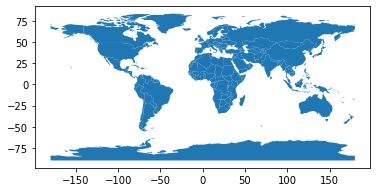

In [55]:
world.plot()

In [56]:
df_trade['Intervention_ID'] = df_trade['Intervention ID']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
df_trade.groupby(["Implementing Jurisdiction"]).Intervention_ID.count()

Implementing Jurisdiction
Afghanistan                6
Albania                  124
Algeria                  431
Angola                   212
Antigua and Barbuda       16
                        ... 
Vietnam                 1880
Virgin Islands, U.S.       2
Yemen                     16
Zambia                   155
Zimbabwe                 197
Name: Intervention_ID, Length: 181, dtype: int64

In [58]:
drop_gta_df = df_trade.dropna(subset=['GTA_Evaluation'])

In [59]:
drop_gta_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count()

Implementing Jurisdiction
Afghanistan                6
Albania                  124
Algeria                  431
Angola                   212
Antigua and Barbuda       16
                        ... 
Vietnam                 1880
Virgin Islands, U.S.       2
Yemen                     16
Zambia                   155
Zimbabwe                 197
Name: Intervention_ID, Length: 181, dtype: int64

In [60]:
yr_df = drop_gta_df[drop_gta_df['GTA_Evaluation'] == "Green"]

In [61]:
yr_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count()

Implementing Jurisdiction
Afghanistan               1
Albania                  75
Algeria                  85
Angola                   89
Antigua and Barbuda       8
                       ... 
Venezuela              1037
Vietnam                 715
Yemen                     3
Zambia                   90
Zimbabwe                 92
Name: Intervention_ID, Length: 175, dtype: int64

In [62]:
yr_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count() / drop_gta_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count()

Implementing Jurisdiction
Afghanistan             0.166667
Albania                 0.604839
Algeria                 0.197216
Angola                  0.419811
Antigua and Barbuda     0.500000
                          ...   
Vietnam                 0.380319
Virgin Islands, U.S.         NaN
Yemen                   0.187500
Zambia                  0.580645
Zimbabwe                0.467005
Name: Intervention_ID, Length: 181, dtype: float64

In [63]:
percent_green = pd.DataFrame(yr_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count() / drop_gta_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count())

In [64]:
percent_green.head()

,Intervention_ID
Implementing Jurisdiction,
Afghanistan,0.166667
Albania,0.604839
Algeria,0.197216
Angola,0.419811
Antigua and Barbuda,0.500000


In [65]:
percent_green.sort_values(by='Intervention_ID', ascending=False).head()

,Intervention_ID
Implementing Jurisdiction,
Guam,1.000000
Northern Mariana Islands,1.000000
Libya,1.000000
Seychelles,0.916667
Lebanon,0.909091


In [66]:
percent_green['percent_discriminatory'] = 1 - percent_green['Intervention_ID']

In [67]:
percent_green = percent_green.reset_index()

In [68]:
world.sort_values(by='name', ascending=True).head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
103,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
125,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
82,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
74,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


In [69]:
percent_green.head()

,Implementing Jurisdiction,Intervention_ID,percent_discriminatory
0,Afghanistan,0.166667,0.833333
1,Albania,0.604839,0.395161
2,Algeria,0.197216,0.802784
3,Angola,0.419811,0.580189
4,Antigua and Barbuda,0.500000,0.500000


In [70]:
world["name"].replace({"W. Sahara": "Western Sahara",
                                'Dem. Rep. Congo':'Congo, The Democratic Republic of the',
                                 'Dominican Rep.':'Dominican Republic',
                                 'Falkland Is.':'Falkland Islands (Malvinas)',
                                 'Fr. S. Antarctic Lands':'Antarctica',
                                 'Central African Rep.': 'Central African Republic',
                                 'Eq. Guinea':'Equatorial Guinea',
                                 'eSwatini': 'Eswatini',
                                 'Solomon Is.': 'Solomon Islands',
                                 'N. Cyprus': 'Cyprus',
                                 'Bosnia and Herz.':'Bosnia and Herzegovina',
                                 'S. Sudan': 'South Sudan', 'Sudan': 'Republic of the Sudan	'
                                }, inplace=True)

In [71]:
percent_green_minus = percent_green[percent_green['Implementing Jurisdiction'].isin(world['name'])].sort_values(
    by='Implementing Jurisdiction', ascending=True)

In [72]:
world_minus = world[world['name'].isin(percent_green['Implementing Jurisdiction'])].sort_values(
    by='name', ascending=True)

In [73]:
set(list(percent_green_minus['Implementing Jurisdiction'])) - set(list(world_minus['name']))

set()

In [74]:
percent_green_minus.head()

,Implementing Jurisdiction,Intervention_ID,percent_discriminatory
0,Afghanistan,0.166667,0.833333
1,Albania,0.604839,0.395161
2,Algeria,0.197216,0.802784
3,Angola,0.419811,0.580189
5,Argentina,0.358596,0.641404


In [75]:

set(list(world_minus['name'])) - set(list(percent_green_minus['Implementing Jurisdiction']))

set()

In [76]:
world_minus.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
103,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
125,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
82,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
74,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [77]:
percent_green_minus['name'] = percent_green_minus['Implementing Jurisdiction']

In [78]:
world_merge = pd.merge(percent_green_minus, world_minus, on='name', how='inner')

In [79]:
world_merge[world_merge['percent_discriminatory'].isna()]

,Implementing Jurisdiction,Intervention_ID,percent_discriminatory,name,pop_est,continent,iso_a3,gdp_md_est,geometry
43,Equatorial Guinea,NaN,NaN,Equatorial Guinea,778358,Africa,GNQ,31770.0,"POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1..."
113,Puerto Rico,NaN,NaN,Puerto Rico,3351827,North America,PRI,131000.0,"POLYGON ((-66.28243 18.51476, -65.77130 18.426..."


AttributeError: 'Line2D' object has no property 'column'

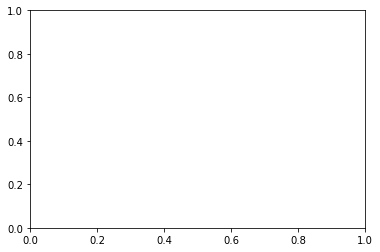

In [81]:
world_merge.plot(column='percent_discriminatory');

In [82]:
world2 = world[world['name'].isin(world_minus['name'])]

In [83]:
world_merge = pd.merge(world, percent_green_minus, on='name', how='inner')

In [84]:
world_merge.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Implementing Jurisdiction,Intervention_ID,percent_discriminatory
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,0.466667,0.533333
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,0.384831,0.615169
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.234288,0.765712
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,0.172371,0.827629
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,0.411105,0.588895


In [85]:
world_merge[world_merge['Implementing Jurisdiction'].str.contains(pat='Sudan')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Implementing Jurisdiction,Intervention_ID,percent_discriminatory


/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


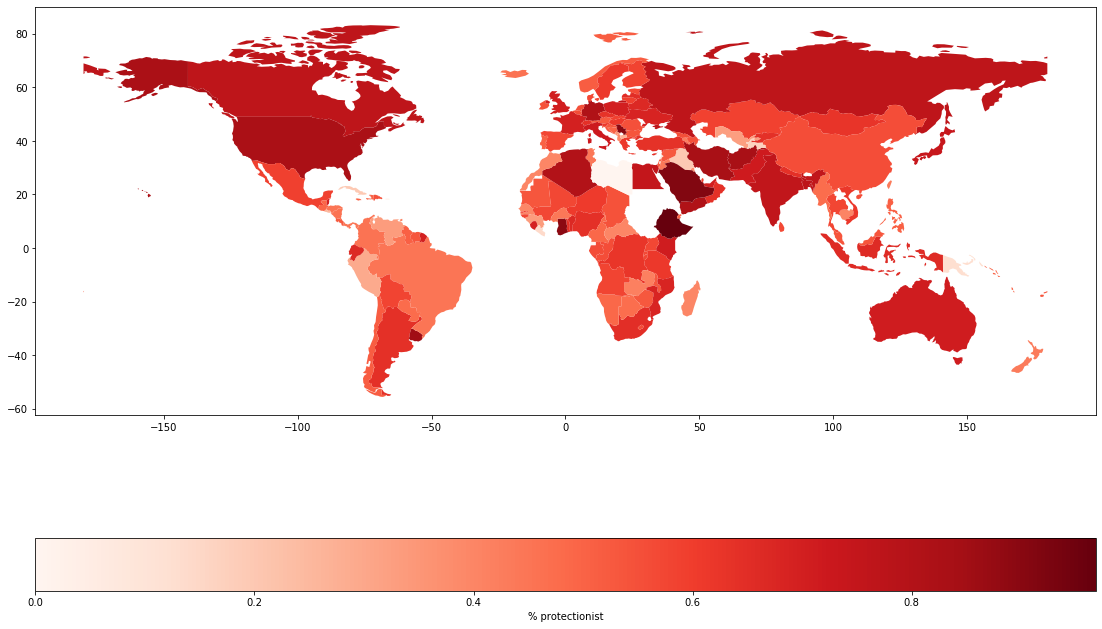

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(19, 15))
world_merge.plot(column='percent_discriminatory', 
                 ax=ax, legend=True, cmap='Reds',
                legend_kwds={'label': "% protectionist",'orientation': "horizontal"})




In [2]:

# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [ ]:
df_trade[df_trade['Removal Date'].isna()]

In [ ]:
percent_green['country_APLHA3'] = percent_green["Implementing Jurisdiction"].apply(lambda x: 
                                            pcc.country_name_to_country_alpha3(x, cn_name_format="default"))



In [ ]:
percent_green.head()

In [ ]:
percent_green.sort_values(by='country_APLHA3', ascending=True).head()

In [ ]:
percent_green = percent_green.sort_values(by='country_APLHA3', ascending=True)

In [ ]:
world['country_APLHA3'] = world["name"]

In [ ]:
world = world[world['name'] != "Kosovo"]

In [ ]:
list(pycountry.countries)

In [ ]:
world["country_APLHA3"].replace({"W. Sahara": "Western Sahara",
                                'Dem. Rep. Congo':'Congo, The Democratic Republic of the',
                                 'Dominican Rep.':'Dominican Republic',
                                 'Falkland Is.':'Falkland Islands (Malvinas)',
                                 'Fr. S. Antarctic Lands':'Antarctica',
                                 'Central African Rep.': 'Central African Republic',
                                 'Eq. Guinea':'Equatorial Guinea',
                                 'eSwatini': 'Eswatini',
                                 'Solomon Is.': 'Solomon Islands',
                                 'N. Cyprus': 'Cyprus',
                                 'Bosnia and Herz.':'Bosnia and Herzegovina',
                                 'S. Sudan': 'South Sudan'
                                }, inplace=True)




In [ ]:
world['country_APLHA3'] = world["country_APLHA3"].apply(lambda x: 
                                            pcc.country_name_to_country_alpha3(x, cn_name_format="default"))



In [ ]:
world.head()

In [ ]:
world[world['name'].str.contains(pat="Sudan")]

In [ ]:
percent_green[percent_green['Implementing Jurisdiction'].str.contains(pat="Sudan")]

In [223]:
world = world.sort_values(by='country_APLHA3', ascending=True)

In [231]:
world = world.set_index('country_APLHA3')

In [232]:
world.loc['AFG']

pop_est                                                34124811
continent                                                  Asia
name                                                Afghanistan
iso_a3                                                      AFG
gdp_md_est                                                64080
geometry      POLYGON ((66.51860680528867 37.36278432875879,...
Name: AFG, dtype: object

In [237]:
world.reset_index()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
country_APLHA3,,,,,,
AFG,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
AGO,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
ALB,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
ARE,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
ARG,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [288]:
world = world.reset_index()
country_list = list(world['country_APLHA3'])

In [289]:
world = world.set_index('country_APLHA3')

In [290]:
country_list.remove('ATA')
country_list.remove('ATA')

In [298]:
country_list.remove('BHS')
country_list.remove('BTN')

In [301]:
country_list.remove('ERI')

TypeError: 'list' object is not callable

In [302]:
props = {}
for i in country_list:
    props[i] = percent_green['percent_discriminatory'].loc[i]

KeyError: 'ESH'

In [248]:
percent_green['percent_discriminatory']

country_APLHA3
AFG    0.833333
AGO    0.580189
ALB    0.395161
ARE    0.705426
ARG    0.641404
         ...   
WSM    0.500000
YEM    0.812500
ZAF    0.648425
ZMB    0.419355
ZWE    0.532995
Name: percent_discriminatory, Length: 181, dtype: float64

In [247]:
percent_green = percent_green.set_index('country_APLHA3')

In [266]:
country_list.remove('ATA')

In [267]:
country_list

['AGO',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BOL',
 'BRA',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'CRI',
 'CUB',
 'CYP',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ERI',
 'ESH',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FLK',
 'FRA',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRL',
 'GTM',
 'GUY',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDA',
 'MDG',
 'MEX',
 'MKD',
 'MLI',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MWI',
 'MYS',
 'NAM',
 'NCL',
 'NER',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'PNG',
 'POL',


In [274]:
for i in country_list:
    print(i)

AFG
AGO
ALB
ARE
ARG
ARM
ATA
AUS
AUT
AZE
BDI
BEL
BEN
BFA
BGD
BGR
BHS
BIH
BLR
BLZ
BOL
BRA
BRN
BTN
BWA
CAF
CAN
CHE
CHL
CHN
CIV
CMR
COD
COG
COL
CRI
CUB
CYP
CYP
CZE
DEU
DJI
DNK
DOM
DZA
ECU
EGY
ERI
ESH
ESP
EST
ETH
FIN
FJI
FLK
FRA
GAB
GBR
GEO
GHA
GIN
GMB
GNB
GNQ
GRC
GRL
GTM
GUY
HND
HRV
HTI
HUN
IDN
IND
IRL
IRN
IRQ
ISL
ISR
ITA
JAM
JOR
JPN
KAZ
KEN
KGZ
KHM
KOR
KWT
LAO
LBN
LBR
LBY
LKA
LSO
LTU
LUX
LVA
MAR
MDA
MDG
MEX
MKD
MLI
MMR
MNE
MNG
MOZ
MRT
MWI
MYS
NAM
NCL
NER
NGA
NIC
NLD
NOR
NPL
NZL
OMN
PAK
PAN
PER
PHL
PNG
POL
PRI
PRK
PRT
PRY
PSE
QAT
ROU
RUS
RWA
SAU
SDN
SEN
SLB
SLE
SLV
SOM
SOM
SRB
SSD
SUR
SVK
SVN
SWE
SWZ
SYR
TCD
TGO
THA
TJK
TKM
TLS
TTO
TUN
TUR
TWN
TZA
UGA
UKR
URY
USA
UZB
VEN
VNM
VUT
YEM
ZAF
ZMB
ZWE


In [89]:
world2['gdp_per_capita'] = world2['gdp_md_est'] / world2['pop_est']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
world2.plot.scatter(x='gdp_per_capita', y='percent_discriminatory')

AttributeError: 'function' object has no attribute 'scatter'

In [102]:
world_merge['gdp_per_cap'] = world_merge.gdp_md_est / world_merge.pop_est

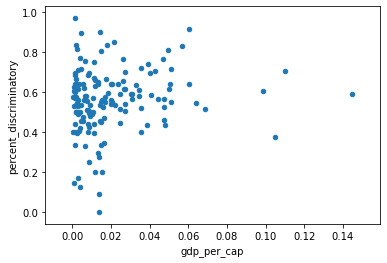

In [103]:
pd.DataFrame(world_merge).plot.scatter(x='gdp_per_cap', y='percent_discriminatory')